# Lesson 12: Final Project

## Intro to Quantified Cognition

<a href="https://colab.research.google.com/github/compmem/QuantCog/blob/2022_Fall/notebooks/12_Final_Project.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

## Student Experiences of Teaching (SET)

I value your feedback so that I can work to improve this course! 

Please fill out the evaluations before the close date (which I think is midnight on Dec. 8th).  

## Final Project

- The goal of the final project is to demonstrate some application of some of the modeling tools we've discussed this semester. 

- Unless you are developing a novel theory, most mechanistic cognitive modeling involves making use of an existing model, which you then may tweak for your needs/hypotheses.

- We've covered a handful of different cognitive models this semester, with code included in various Jupyter notebooks along the way, so you have a number of ready-made models at your disposal.

- Below I list some options for this final project:

## General Info

- Please turn in the project in the form of a Jupyter notebook, along with any other files I might need to run the notebook. You don't need to send me the data files I provided to you, just if you used your own data/code.

- Show all your work and include both code and text cells walking me through what you are doing.

- It is due ***Friday, December 16th, 2022 at 5:00 PM***. I selected this date because it's the day and time of the last final during the exam period (our actual final time is a week earlier, so I figured you wouldn't want me to use that day), and I need to have final grades submitted within the next day and a half.

- I will be available for meetings from now until it is due. Please message me on discord me to schedule one.

## Option 0: Some analysis of your own data

Many of you have datasets from your own research. Your project would entail performing some form of Bayesian or cognitive model-based analysis of those data. 

*Please meet with me to get approval for the project.*

You must include the following:

- A short intro (a couple sentences) explaining the question you'll be asking (to frame the analysis)
- Test some alternative model variants
- Some form of model comparison (via Bayes Factor, BPIC, WAIC, etc...)
- Show model fit (at least best-fitting params, but potentially posterior predictives)
- Summary of findings

## Option 1: Generating Model Contest

Very often we have some data and our goal is to identify what model might have generated those data. Starns et al. (2019) provided a facinating example of this when they had a handful of researchers attempt to infer the generating processes of known data, revealing large variability in experts’ judgments on the same data (https://journals.sagepub.com/doi/10.1177/2515245919869583).

For this project, I have generated three sets of data with three different decision models: WFPT, TRDM, and LBA. 

Your job is to fit models (and model varariants with and without some params free, such as between-trial variability in drift rate) to identify what models (and parameter values, as best fits or posteriors) were used to generate each set of data.

This will require model comparison, via some method of your choosing (Bayes Factor, BPIC, WAIC, etc...).

In your report, make it clear each model variant you are testing, what model you think generated each dataset (along with the posteriors or best-fitting parameters) for that model, and what evidence you are using to make your claim for the each winning model.

## Option 2: Flanker Analysis

While there have been full models of cognitive control proposed to account for the dynamics of the decision process in congruent vs. incongruent conditions, insight can be gained by fitting to these two conditions separately with a standard decision-making model.

- Fit the WFPT, TRDM, or LBA model separately to the incongruent and congruent trials from the flanker task.
- Decide what parameters should be kept constant between the two conditions and what parameters should be allowed to change.
- Justify this decision (perhaps even via a model comparison).
- Show fits of the best-fitting parameters (or posterior predictives) to the data.
- Show full posteriors for the parameters and discuss whether they make sense.


## Option 3: Apply the Successor Representation model to a new RL Problem

In class we applied the successor representation (SR) to the Frozen Lake example provided by the AI Gymnasium.

For this option, your task would be to apply the SR to an RL problem that we did not already solve. Some options would be:

- Another one of the text-based environments on the AI Gymnasium: https://gymnasium.farama.org/environments/toy_text/
  The reason to use the text-based environments is that they have lower numbers of states that do not require deep convolutional networks to define. 
  
- Some other problem that you propose. I'm happy to work with you to decide on another problem you'd like to apply the SR (or some other RL-model) to solve.

In your write-up, be sure to clearly define your problem, how you assessed model performance (e.g., reward earned for each game, number of trials to learn, etc...), describe what changes you had to make to the parameters to attain the performance you did, and, optionally, explore the effect different model parameters have on performance.

## Option 4: Develop and test a Multi-Scale Successor Representation model

Recent work has extended the standard successor representation to operate over multiple scales (Momennejad, I., and Howard M.W., 2018; https://www.biorxiv.org/content/10.1101/449470v1).

The primary insight is that if you learn multiple SR matrices at different values of discount factor $\gamma$, then you can reconstruct the
sequence of expected future states following a given starting state. Here is what that would look like for a grid world:

![](figs/MSSR.png)

For this option, you would need to meet with me to discuss the model in more detail and I would provide you with code to pick the different values of $\gamma$ and to perform the inverse transform necessary to *reconstruct the sequence of future states*. You would then need to update the SR code to learn multiple SRs and not just one for each action. You will also need to update the policy to make use of the new multi-scale SR.

You would then assess the model by recreating a visualization like above for the Frozen Lake task, and test whether the model can solve the problem as well as with the single SR.

## Option 5: Explore TCM or SAM variants for the CatCR or FR tasks

For the examples in class, I presented one model variant of a Temporal Context Model (TCM) applied to the categorical continuous recognition (CatCR) and free recall (FR) data. We also discussed the Search of Associative Memory (SAM) model to free recall. There are a number of valid model variants that may or may not provide a better fit to the observed data.

For this option, you would explore some of those model variants and perform a model comparison on one subject (e.g., Subject 10 in the CatCR data) that showed the interesting trend in the data we saw across participants. Some options include:

- Changing how the sources of memory strength are calculated.
- Trying variants of how distinctiveness is calculated.
- Adding in a WFPT, TRDM, or LBA decision rule to replace the softmax (if you choose this one, it would be the only model you have to try, but bonus for comparing different choice/RT decision rules!)
- Changing how SAM forms associations or retrieves items to improve contiguity.

I will gladly meet with you to discuss interesting model variants to try out.

In your write-up, be sure to describe the motivation for each model variant (i.e., what is the explicit mechanistic hypothesis you are testing?), and, where applicable, perform model comparisons. Include fits to the actual data (best-fitting parameters are fine, given that this model is slower to run.) 

## Datasets

The cells below illustrate how to read in the contest and flanker datasets.

In [1]:
# load matplotlib inline mode
%matplotlib inline

# import some useful libraries
import numpy as np                # numerical analysis linear algebra
import pandas as pd               # efficient tables
import matplotlib.pyplot as plt   # plotting

def dhist(dat, nsims, alpha=.3, color='b'):
    p,b = np.histogram(dat,bins='auto',density=True)
    w = b[1]-b[0]
    p *= float(len(dat))/nsims
    return plt.bar(b[1:]-w,p,width=w,alpha=.3,color=color)


### Contest data

There are three dataset files: `contest_data_01.csv`, `contest_data_02.csv`, and `contest_data_03.csv`.

When I simulated the models to generate the data, I set the `max_time=5.0`, so you can use that value for all your model fits.

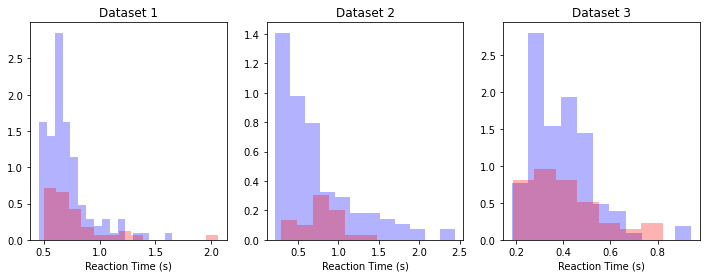

In [2]:
plt.figure(figsize=(12, 4))
for d in range(3):
    plt.subplot(1, 3, d+1)
    dat = pd.read_csv('contest_data_%02d.csv'%(d+1), index_col='Unnamed: 0')
    dhist(dat.loc[dat.correct==1, 'rt'], len(dat))
    dhist(dat.loc[dat.correct==0, 'rt'], len(dat), color='r')
    plt.xlabel('Reaction Time (s)')
    plt.title('Dataset %d' % (d+1))

### Flanker data

These data are a from a single subject performing a standard flanker task. The `cond` column indicates whether the trial was congruent (`+`) or incongruent (`-`). 

In [3]:
dat = pd.read_csv('flanker_s1.csv', index_col='Unnamed: 0')
dat.head()

,cond,correct,rt,trial
1,-,True,0.911576,1
2,-,True,0.512677,2
3,-,True,0.584308,3
4,+,True,0.461280,4
7,+,True,0.697124,5


Text(0.5, 1.0, 'Incongruent')

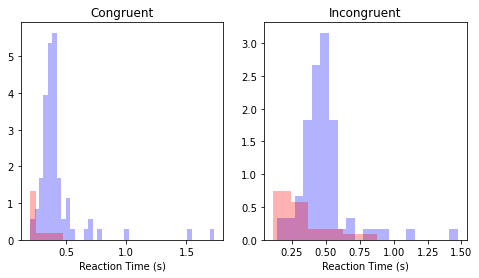

In [4]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
dhist(dat.loc[(dat.cond=='+')&(dat.correct==1), 'rt'], (dat.cond=='+').sum())
dhist(dat.loc[(dat.cond=='+')&(dat.correct==0), 'rt'], 
      (dat.cond=='+').sum(), color='r')
plt.xlabel('Reaction Time (s)')
plt.title('Congruent')

plt.subplot(1, 2, 2)
dhist(dat.loc[(dat.cond=='-')&(dat.correct==1), 'rt'], (dat.cond=='-').sum())
dhist(dat.loc[(dat.cond=='-')&(dat.correct==0), 'rt'], 
      (dat.cond=='-').sum(), color='r')
plt.xlabel('Reaction Time (s)')
plt.title('Incongruent')